


                                                        #IMPORTING DEPENDANCIES





In [27]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Define data directory
data_dir = 'mammals'

In [4]:
# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

In [5]:
# Using ImageDataGenerator to preprocess and augment data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 9564 images belonging to 39 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2371 images belonging to 39 classes.


In [8]:
# Define CNN model
input_layer = Input(shape=(img_height, img_width, 3))
model = tf.keras.models.Sequential([
    input_layer,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


C:\Users\jacin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


298/298 ━━━━━━━━━━━━━━━━━━━━ 2983s 10s/step - accuracy: 0.0653 - loss: 3.5215 - val_accuracy: 0.1546 - val_loss: 3.1248
Epoch 2/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0625 - loss: 1.6318 - val_accuracy: 0.3333 - val_loss: 1.4563


C:\Users\jacin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 2914s 10s/step - accuracy: 0.1737 - loss: 3.0022 - val_accuracy: 0.2268 - val_loss: 2.8321
Epoch 4/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 9s 634us/step - accuracy: 0.0938 - loss: 1.3903 - val_accuracy: 0.6667 - val_loss: 0.8431
Epoch 5/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 3150s 11s/step - accuracy: 0.2418 - loss: 2.7250 - val_accuracy: 0.2800 - val_loss: 2.6460
Epoch 6/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 10s 767us/step - accuracy: 0.2500 - loss: 1.3487 - val_accuracy: 0.3333 - val_loss: 1.5838
Epoch 7/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 2958s 10s/step - accuracy: 0.3106 - loss: 2.4894 - val_accuracy: 0.3167 - val_loss: 2.5564
Epoch 8/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 9s 548us/step - accuracy: 0.3438 - loss: 1.1889 - val_accuracy: 0.6667 - val_loss: 1.3669
Epoch 9/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 2944s 10s/step - accuracy: 0.3803 - loss: 2.1990 - val_accuracy: 0.3387 - val_loss: 2.4962
Epoch 10/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 8s 636us/step - accuracy: 0.3750 - loss: 1.1

In [11]:
# Print training history
print(history.history)

{'accuracy': [0.09746118634939194, 0.0625, 0.1905161589384079, 0.09375, 0.25188836455345154, 0.25, 0.32249265909194946, 0.34375, 0.38638269901275635, 0.375], 'loss': [3.358374834060669, 1.6263525485992432, 2.95511531829834, 1.3856806755065918, 2.7069215774536133, 1.344170093536377, 2.438920021057129, 1.1849370002746582, 2.1944544315338135, 1.1887006759643555], 'val_accuracy': [0.15456080436706543, 0.3333333432674408, 0.22677364945411682, 0.6666666865348816, 0.2799831032752991, 0.3333333432674408, 0.31672295928001404, 0.6666666865348816, 0.3386824429035187, 0.3333333432674408], 'val_loss': [3.1247751712799072, 1.4563452005386353, 2.832089900970459, 0.8431203365325928, 2.6459908485412598, 1.5838028192520142, 2.556424856185913, 1.3669167757034302, 2.496211290359497, 0.8692173361778259]}


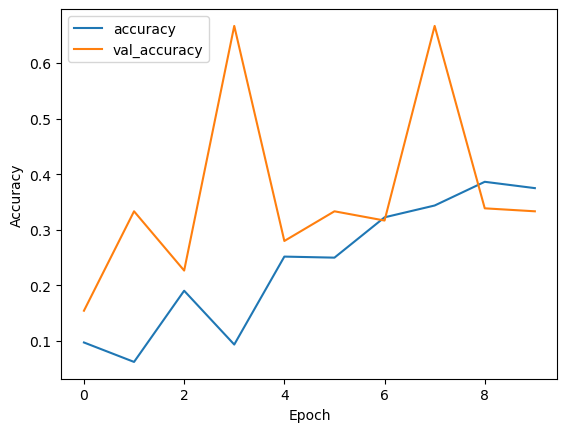

In [12]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

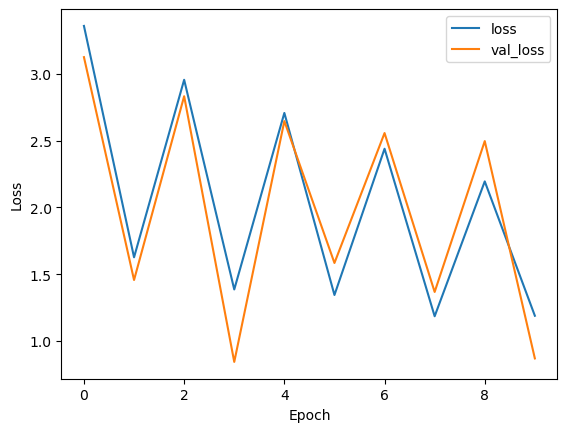

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# Save the model
model.save("mammals_cnn_model.h5")

In [26]:
# Print training and validation metrics
print("Training Accuracy:", history.history['accuracy'])
print("Training Loss:", history.history['loss'])
print("Validation Accuracy:", history.history['val_accuracy'])
print("Validation Loss:", history.history['val_loss'])

Training Accuracy: [0.09746118634939194, 0.0625, 0.1905161589384079, 0.09375, 0.25188836455345154, 0.25, 0.32249265909194946, 0.34375, 0.38638269901275635, 0.375]
Training Loss: [3.358374834060669, 1.6263525485992432, 2.95511531829834, 1.3856806755065918, 2.7069215774536133, 1.344170093536377, 2.438920021057129, 1.1849370002746582, 2.1944544315338135, 1.1887006759643555]
Validation Accuracy: [0.15456080436706543, 0.3333333432674408, 0.22677364945411682, 0.6666666865348816, 0.2799831032752991, 0.3333333432674408, 0.31672295928001404, 0.6666666865348816, 0.3386824429035187, 0.3333333432674408]
Validation Loss: [3.1247751712799072, 1.4563452005386353, 2.832089900970459, 0.8431203365325928, 2.6459908485412598, 1.5838028192520142, 2.556424856185913, 1.3669167757034302, 2.496211290359497, 0.8692173361778259]


In [29]:
# Make predictions
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes

75/75 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step


In [30]:
# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

In [31]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.026149304091100802
Precision: 0.026939797219519973
Recall: 0.026149304091100802
F1 Score: 0.024452773809642166
